<a href="https://colab.research.google.com/github/bbchen33/Deep-learning/blob/master/Tensorflow-small-image-cifar10-training.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
%tensorflow_version 2.x

In [0]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import tensorflow as tf
import tensorflow.keras as keras
(X_train, y_train), (X_test, y_test) = keras.datasets.cifar10.load_data()

In [9]:
print(X_train.shape)
print(X_test.shape)

(50000, 32, 32, 3)
(10000, 32, 32, 3)


In [0]:
labels = ['airplane', 'automobile', 'bird', 'cat', 'deer',
          'dog', 'frog', 'horse', 'ship', 'truck']

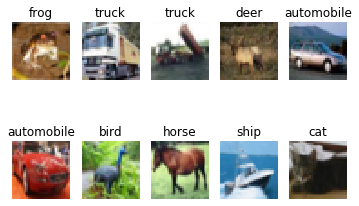

In [11]:
for i in range(10):
  plt.subplot(2,5,i+1)  
  plt.imshow(X_train[i,:,:,:])
  plt.title(labels[int(y_train[i])])
  plt.axis('off')

In [12]:
print(X_train.max())
print(X_train.min())
X_train_normal = X_train/255
print(X_train_normal.max())


255
0
1.0


Normalize by dividing 255 (max value of the pixels)

In [0]:
X_test_normal = X_test/255

In [0]:
y_train_category = tf.keras.utils.to_categorical(y_train, 10)
y_test_category = tf.keras.utils.to_categorical(y_test, 10)

In [15]:
print(y_train_category[:5])

[[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]]


In [0]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape = (32,32,3)),
    tf.keras.layers.Dense(500, activation = 'relu'),
    tf.keras.layers.Dense(500, activation = 'relu'),
    tf.keras.layers.Dense(128, activation = 'relu'),    
    tf.keras.layers.Dense(10, activation = 'softmax')    
])

In [17]:
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])
history = model.fit(X_train_normal, y_train_category, batch_size = 128, epochs = 10, validation_split = 0.2)

Train on 40000 samples, validate on 10000 samples
Epoch 1/10


40000/40000 [==============================] - 4s 90us/sample - loss: 1.9056 - accuracy: 0.3092 - val_loss: 1.7774 - val_accuracy: 0.3663
Epoch 2/10
40000/40000 [==============================] - 2s 49us/sample - loss: 1.6924 - accuracy: 0.3950 - val_loss: 1.6704 - val_accuracy: 0.4047
Epoch 3/10
40000/40000 [==============================] - 2s 50us/sample - loss: 1.6117 - accuracy: 0.4230 - val_loss: 1.5881 - val_accuracy: 0.4301
Epoch 4/10
40000/40000 [==============================] - 2s 51us/sample - loss: 1.5417 - accuracy: 0.4486 - val_loss: 1.5604 - val_accuracy: 0.4498
Epoch 5/10
40000/40000 [==============================] - 2s 51us/sample - loss: 1.4999 - accuracy: 0.4636 - val_loss: 1.5136 - val_accuracy: 0.4615
Epoch 6/10
40000/40000 [==============================] - 2s 49us/sample - loss: 1.4593 - accuracy: 0.4774 - val_loss: 1.4974 - val_accuracy: 0.4681
Epoch 7/10
40000/40000 [==============================] - 2s 49us/sample - loss: 1.4240 - accuracy: 0.4884 - val_loss

In [0]:
def training_progress(model, history):
  plt.figure(figsize=(10,5))
  plt.subplot(1,2,1)
  plt.plot(history.history['accuracy'], label = 'train_accuracy')
  plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
  plt.title('Accuracy')
  plt.legend()
  
  plt.subplot(1,2,2)
  plt.plot(history.history['loss'], label = 'train_loss')
  plt.plot(history.history['val_loss'], label = 'val_loss')
  plt.title('Loss')  
  plt.legend()
  plt.show()

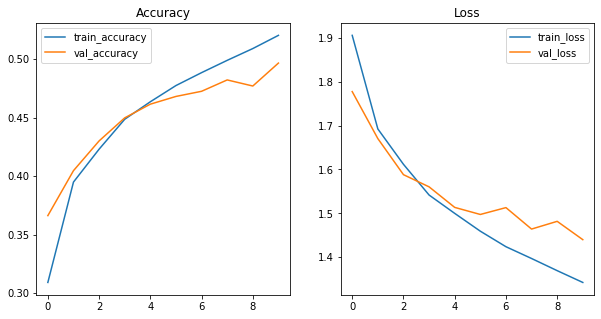

10000/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

In [25]:
training_progress(model, history)
print('Trained with dense layers gives test accuracy of:',model.evaluate(X_test_normal, y_test_category)[1])

The model trained with only dense layers did not seem to be able to give good accuracy.

In [0]:
model2 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(100, (3,3), activation = 'relu', input_shape = (32,32,3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

In [30]:
model2.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])
history2 = model2.fit(X_train_normal, y_train_category, batch_size = 128, epochs = 10, validation_split = 0.2)

Train on 40000 samples, validate on 10000 samples
Epoch 1/10


40000/40000 [==============================] - 7s 176us/sample - loss: 1.5697 - accuracy: 0.4553 - val_loss: 1.2721 - val_accuracy: 0.5594
Epoch 2/10
40000/40000 [==============================] - 3s 84us/sample - loss: 1.1774 - accuracy: 0.5865 - val_loss: 1.1637 - val_accuracy: 0.5937
Epoch 3/10
40000/40000 [==============================] - 3s 84us/sample - loss: 1.0250 - accuracy: 0.6418 - val_loss: 1.1051 - val_accuracy: 0.6231
Epoch 4/10
40000/40000 [==============================] - 3s 83us/sample - loss: 0.9051 - accuracy: 0.6846 - val_loss: 1.0080 - val_accuracy: 0.6549
Epoch 5/10
40000/40000 [==============================] - 3s 83us/sample - loss: 0.7936 - accuracy: 0.7234 - val_loss: 0.9742 - val_accuracy: 0.6627
Epoch 6/10
40000/40000 [==============================] - 3s 86us/sample - loss: 0.6970 - accuracy: 0.7621 - val_loss: 1.0002 - val_accuracy: 0.6634
Epoch 7/10
40000/40000 [==============================] - 3s 84us/sample - loss: 0.5959 - accuracy: 0.7958 - val_los

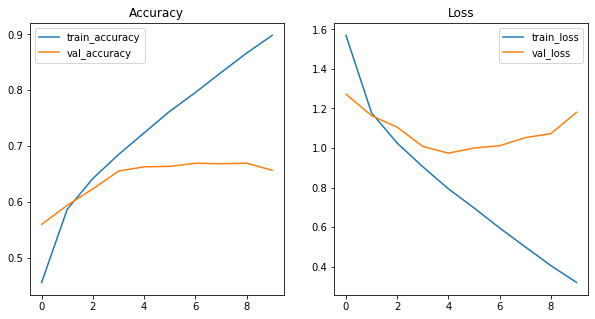

10000/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

In [31]:
training_progress(model2, history2)
print('Trained with CNN gives test accuracy of:',model2.evaluate(X_test_normal, y_test_category)[1])

The accuracy for the train set is very good but not good for the test set. It's clear that the model is overfitting the training data. Let's try adding 2 dropout steps to turn off half of the nodes.

In [0]:
model3 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(100, (3,3), activation = 'relu', input_shape = (32,32,3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Flatten(),    
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

In [34]:
model3.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])
history3 = model3.fit(X_train_normal, y_train_category, batch_size = 128, epochs = 10, validation_split = 0.2)

Train on 40000 samples, validate on 10000 samples
Epoch 1/10


40000/40000 [==============================] - 4s 112us/sample - loss: 1.5739 - accuracy: 0.4381 - val_loss: 1.3016 - val_accuracy: 0.5439
Epoch 2/10
40000/40000 [==============================] - 4s 90us/sample - loss: 1.2855 - accuracy: 0.5461 - val_loss: 1.1946 - val_accuracy: 0.5765
Epoch 3/10
40000/40000 [==============================] - 4s 93us/sample - loss: 1.1615 - accuracy: 0.5901 - val_loss: 1.1132 - val_accuracy: 0.6105
Epoch 4/10
40000/40000 [==============================] - 4s 93us/sample - loss: 1.0795 - accuracy: 0.6212 - val_loss: 1.0714 - val_accuracy: 0.6290
Epoch 5/10
40000/40000 [==============================] - 4s 92us/sample - loss: 0.9946 - accuracy: 0.6499 - val_loss: 1.0345 - val_accuracy: 0.6387
Epoch 6/10
40000/40000 [==============================] - 4s 92us/sample - loss: 0.9338 - accuracy: 0.6687 - val_loss: 0.9967 - val_accuracy: 0.6573
Epoch 7/10
40000/40000 [==============================] - 4s 92us/sample - loss: 0.8763 - accuracy: 0.6898 - val_los

Adding complexity to the model to see if it can improve the learning.

In [0]:
model4 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(100, (3,3), activation = 'relu', input_shape = (32,32,3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    
    tf.keras.layers.Conv2D(100, (3,3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    
    tf.keras.layers.Conv2D(500, (3,3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2, 2), 
    
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Flatten(),    
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

In [36]:
model4.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])
history4 = model4.fit(X_train_normal, y_train_category, batch_size = 128, epochs = 5, validation_split = 0.2)

Train on 40000 samples, validate on 10000 samples
Epoch 1/5


40000/40000 [==============================] - 5s 127us/sample - loss: 1.7571 - accuracy: 0.3428 - val_loss: 1.4283 - val_accuracy: 0.4771
Epoch 2/5
40000/40000 [==============================] - 4s 100us/sample - loss: 1.3891 - accuracy: 0.4949 - val_loss: 1.2826 - val_accuracy: 0.5381
Epoch 3/5
40000/40000 [==============================] - 4s 100us/sample - loss: 1.2331 - accuracy: 0.5569 - val_loss: 1.1401 - val_accuracy: 0.5991
Epoch 4/5
40000/40000 [==============================] - 4s 99us/sample - loss: 1.1321 - accuracy: 0.5944 - val_loss: 1.0402 - val_accuracy: 0.6302
Epoch 5/5
40000/40000 [==============================] - 4s 99us/sample - loss: 1.0604 - accuracy: 0.6226 - val_loss: 0.9891 - val_accuracy: 0.6584


Now the validation score is better than the training set. That means our model is not just memorizing the dataset. Now I can try the same model with more epochs to see if it reaches a better accuracy for the test set.

In [37]:
model4.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])
history4 = model4.fit(X_train_normal, y_train_category, batch_size = 128, epochs = 15, validation_split = 0.2)

Train on 40000 samples, validate on 10000 samples
Epoch 1/15


40000/40000 [==============================] - 5s 119us/sample - loss: 1.0005 - accuracy: 0.6442 - val_loss: 0.9111 - val_accuracy: 0.6781
Epoch 2/15
40000/40000 [==============================] - 4s 98us/sample - loss: 0.9524 - accuracy: 0.6624 - val_loss: 0.8668 - val_accuracy: 0.6976
Epoch 3/15
40000/40000 [==============================] - 4s 97us/sample - loss: 0.9032 - accuracy: 0.6838 - val_loss: 0.8324 - val_accuracy: 0.7103
Epoch 4/15
40000/40000 [==============================] - 4s 98us/sample - loss: 0.8720 - accuracy: 0.6883 - val_loss: 0.7957 - val_accuracy: 0.7242
Epoch 5/15
40000/40000 [==============================] - 4s 97us/sample - loss: 0.8370 - accuracy: 0.7047 - val_loss: 0.7929 - val_accuracy: 0.7260
Epoch 6/15
40000/40000 [==============================] - 4s 99us/sample - loss: 0.8192 - accuracy: 0.7089 - val_loss: 0.7773 - val_accuracy: 0.7261
Epoch 7/15
40000/40000 [==============================] - 4s 99us/sample - loss: 0.7925 - accuracy: 0.7227 - val_los

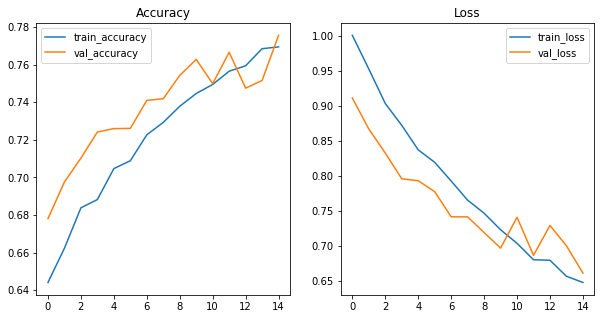

10000/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

In [38]:
training_progress(model4, history4)
print('Trained with CNN gives test accuracy of:',model4.evaluate(X_test_normal, y_test_category)[1])

It's better than before but the accuracy of 0.77 on the test set can still be improved. Now I'm going to do data augmentation to prevent the model from memorizing the train data.

In [0]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(rescale =1./255,rotation_range = 30, width_shift_range = 0.2, horizontal_flip = True,validation_split = 0.2)


In [0]:
processed_train = datagen.flow(X_train[:40000], y_train_category[:40000], batch_size =32, shuffle=True)
processed_val = datagen.flow(X_train[40000:], y_train_category[40000:], batch_size =32, shuffle=True)

In [46]:
model4.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])
history5 = model4.fit_generator(processed_train, epochs = 10, validation_data = processed_val)

Epoch 1/10
1250/1250 [==============================] - 86s 69ms/step - loss: 1.1832 - accuracy: 0.5845 - val_loss: 1.0823 - val_accuracy: 0.6336
Epoch 2/10
1250/1250 [==============================] - 85s 68ms/step - loss: 1.1548 - accuracy: 0.5908 - val_loss: 1.0940 - val_accuracy: 0.6261
Epoch 3/10
1250/1250 [==============================] - 85s 68ms/step - loss: 1.1455 - accuracy: 0.5962 - val_loss: 1.0164 - val_accuracy: 0.6639
Epoch 4/10
1250/1250 [==============================] - 85s 68ms/step - loss: 1.1313 - accuracy: 0.6030 - val_loss: 1.0434 - val_accuracy: 0.6409
Epoch 5/10
1250/1250 [==============================] - 83s 67ms/step - loss: 1.1071 - accuracy: 0.6104 - val_loss: 1.0434 - val_accuracy: 0.6500
Epoch 6/10
1250/1250 [==============================] - 84s 67ms/step - loss: 1.0989 - accuracy: 0.6118 - val_loss: 1.0116 - val_accuracy: 0.6651
Epoch 7/10
1250/1250 [==============================] - 85s 68ms/step - loss: 1.0958 - accuracy: 0.6120 - val_loss: 1.0295 -

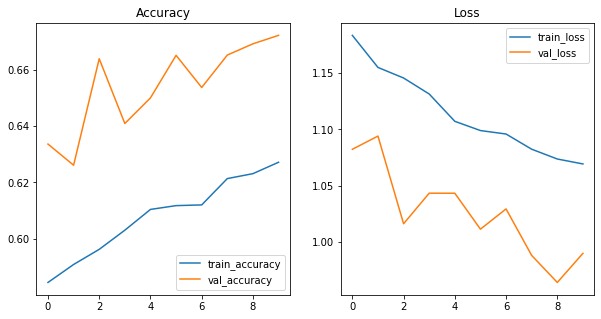

10000/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

In [47]:
training_progress(model4, history5)
print('Trained with CNN gives test accuracy of:',model4.evaluate(X_test_normal, y_test_category)[1])

Now this looks like the model that can make good prediction with sufficient training since the train and validation accuracy are both going up.

We can also play with the optimizer. Nadam was developed after Adam combining NAG and Adam. It is supposed to control the direction of the gradient descent better.

In [48]:
model4.compile(optimizer = 'nadam', loss = 'categorical_crossentropy', metrics = ['accuracy'])
history6 = model4.fit_generator(processed_train, epochs = 10, validation_data = processed_val)

Epoch 1/10
1250/1250 [==============================] - 115s 92ms/step - loss: 1.0409 - accuracy: 0.6357 - val_loss: 0.9416 - val_accuracy: 0.6895
Epoch 2/10
1250/1250 [==============================] - 112s 90ms/step - loss: 1.0382 - accuracy: 0.6346 - val_loss: 0.9723 - val_accuracy: 0.6735
Epoch 3/10
1250/1250 [==============================] - 113s 91ms/step - loss: 1.0294 - accuracy: 0.6397 - val_loss: 0.9620 - val_accuracy: 0.6767
Epoch 4/10
1250/1250 [==============================] - 115s 92ms/step - loss: 1.0279 - accuracy: 0.6409 - val_loss: 0.9365 - val_accuracy: 0.6897
Epoch 5/10
1250/1250 [==============================] - 114s 91ms/step - loss: 1.0136 - accuracy: 0.6431 - val_loss: 0.9376 - val_accuracy: 0.6760
Epoch 6/10
1250/1250 [==============================] - 114s 91ms/step - loss: 1.0057 - accuracy: 0.6506 - val_loss: 0.9785 - val_accuracy: 0.6745
Epoch 7/10
1250/1250 [==============================] - 113s 91ms/step - loss: 1.0019 - accuracy: 0.6509 - val_loss: 0

Turned out the augmented pictures took a lot longer to train and the improvement on the accuracy score is limited so I'll go back to explore training model 4 with nadam optimizer with pre-augmented pictures.

In [49]:
model4.compile(optimizer = 'nadam', loss = 'categorical_crossentropy', metrics = ['accuracy'])
history7 = model4.fit(X_train_normal, y_train_category, batch_size = 128, epochs = 15, validation_split = 0.2)

Train on 40000 samples, validate on 10000 samples
Epoch 1/15


40000/40000 [==============================] - 6s 145us/sample - loss: 0.7448 - accuracy: 0.7405 - val_loss: 0.6828 - val_accuracy: 0.7710
Epoch 2/15
40000/40000 [==============================] - 4s 106us/sample - loss: 0.6983 - accuracy: 0.7565 - val_loss: 0.6810 - val_accuracy: 0.7675
Epoch 3/15
40000/40000 [==============================] - 4s 107us/sample - loss: 0.6620 - accuracy: 0.7669 - val_loss: 0.6716 - val_accuracy: 0.7745
Epoch 4/15
40000/40000 [==============================] - 4s 108us/sample - loss: 0.6425 - accuracy: 0.7734 - val_loss: 0.6789 - val_accuracy: 0.7641
Epoch 5/15
40000/40000 [==============================] - 4s 109us/sample - loss: 0.6141 - accuracy: 0.7826 - val_loss: 0.6242 - val_accuracy: 0.7857
Epoch 6/15
40000/40000 [==============================] - 4s 108us/sample - loss: 0.6008 - accuracy: 0.7874 - val_loss: 0.6259 - val_accuracy: 0.7869
Epoch 7/15
40000/40000 [==============================] - 4s 109us/sample - loss: 0.5846 - accuracy: 0.7919 - v

Nadam did run better than Adam in this case. Last, I will attempt to run as many epochs as possible before the accuracy starts declining by setting an early stopping callback.

In [55]:
early_stopping = keras.callbacks.EarlyStopping(patience = 10)
model4.compile(optimizer = 'nadam', loss = 'categorical_crossentropy', metrics = ['accuracy'])
history8 = model4.fit(X_train_normal, y_train_category, batch_size = 128, 
                      epochs = 100, validation_split = 0.2,
                      callbacks = [early_stopping])

Train on 40000 samples, validate on 10000 samples
Epoch 1/100


40000/40000 [==============================] - 6s 145us/sample - loss: 0.3317 - accuracy: 0.8809 - val_loss: 0.6124 - val_accuracy: 0.7933
Epoch 2/100
40000/40000 [==============================] - 4s 110us/sample - loss: 0.3319 - accuracy: 0.8821 - val_loss: 0.5920 - val_accuracy: 0.7992
Epoch 3/100
40000/40000 [==============================] - 4s 110us/sample - loss: 0.3286 - accuracy: 0.8828 - val_loss: 0.5942 - val_accuracy: 0.7984
Epoch 4/100
40000/40000 [==============================] - 4s 108us/sample - loss: 0.3198 - accuracy: 0.8854 - val_loss: 0.5797 - val_accuracy: 0.8034
Epoch 5/100
40000/40000 [==============================] - 4s 106us/sample - loss: 0.3139 - accuracy: 0.8885 - val_loss: 0.5794 - val_accuracy: 0.8032
Epoch 6/100
40000/40000 [==============================] - 4s 106us/sample - loss: 0.3131 - accuracy: 0.8900 - val_loss: 0.5921 - val_accuracy: 0.8013
Epoch 7/100
40000/40000 [==============================] - 4s 107us/sample - loss: 0.3089 - accuracy: 0.88

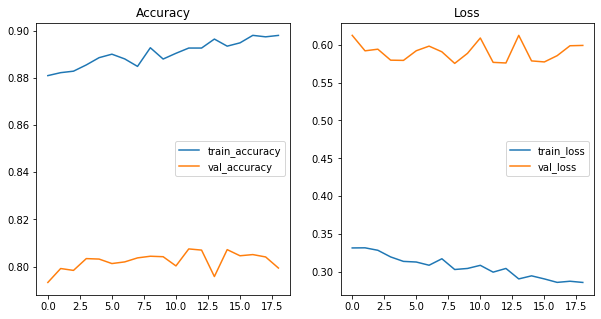

10000/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

In [57]:
training_progress(model4, history8)
print('Trained with CNN + Nadam optimizer gives test accuracy of:',model4.evaluate(X_test_normal, y_test_category)[1])